In [1]:
import numpy as np
import os.path as osp
import matplotlib.pylab as plt
from collections import defaultdict

In [2]:
%matplotlib inline

In [20]:
top_data_dir ='/orions4-zfs/projects/optas/DATA/OUT/latent_diff_maps/experiments/SCAPE_8_poses/evaluations/'

In [21]:
def read_n_cons_type_network_stats(in_f):
    stats = defaultdict(list)
    with open(in_f, 'r') as fin:
        for l in fin:            
            line = l.rstrip()
            
            if len(line) == 0:
                continue
                
            if line.startswith('net='):
                c_net = line.replace('net=', '')
            else:
                tokens = [float(t) for t in line.split()]
                stats[c_net].append(tokens)
    return stats

In [22]:
mlp_file = osp.join(top_data_dir, 'MLPs.txt')
mlp_stats = read_n_cons_type_network_stats(mlp_file)
conv_file = osp.join(top_data_dir, 'CONVs.txt')
conv_stats = read_n_cons_type_network_stats(conv_file)

In [23]:
n_cons = np.array(mlp_stats['Clique'])[:, 0]
cliq_mse = np.array(mlp_stats['Clique'])[:, 3]
k20_mse = np.array(mlp_stats['20NN'])[:, 3]
k10_mse = np.array(mlp_stats['10NN'])[:, 3]

In [24]:
conv_n_cons = np.array(conv_stats['Clique'])[:, 0]
conv_cliq_mse = np.array(conv_stats['Clique'])[:, 3]
conv_k20_mse = np.array(conv_stats['20NN'])[:, 3]
conv_k10_mse = np.array(conv_stats['10NN'])[:, 3]

In [25]:
best_pc_net = 5.772e-02

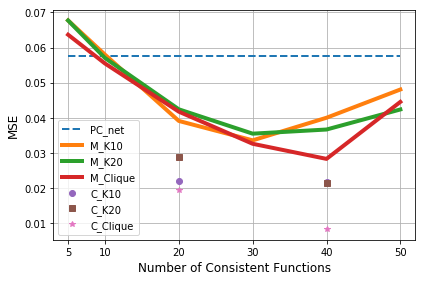

In [26]:
methods = ['PC_net',
          'M_K10', 'M_K20', 'M_Clique',\
          'C_K10', 'C_K20', 'C_Clique',\
          ]

plt.xlim(3,52)
plt.plot(n_cons, np.repeat(best_pc_net, len(n_cons)), '--', linewidth=2)
plt.plot(n_cons, k10_mse, '-', linewidth=4 )
plt.plot(n_cons, k20_mse, '-', linewidth=4)
plt.plot(n_cons, cliq_mse, '-', linewidth=4)

plt.plot(conv_n_cons, conv_k10_mse, 'o')
plt.plot(conv_n_cons, conv_k20_mse, 's')
plt.plot(conv_n_cons, conv_cliq_mse, '*')

plt.legend(methods)

plt.xticks(n_cons.astype(int), n_cons.astype(int))

# plt.title('MSE Comparisons Architectures')
plt.xlabel('Number of Consistent Functions', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.grid()
plt.tight_layout()
plt.savefig('mse_comparissons_sparse_sample.pdf')